In [31]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [33]:
df = pd.read_csv('../data/data_cleaned.csv')
df.head()

,id,sleep_hours_weekday,sleep_quality,sport_hours_per_week,screentime_hours_per_day,is_male
0,1,8,3,6,0,1
1,2,7,6,13,0,0
2,3,5,5,6,11,1
3,4,7,7,5,3,0
4,5,7,6,4,3,0


In [34]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,id,1,52,52,0,0.0%,int64
2,sleep_hours_weekday,2,12,10,0,0.0%,int64
3,sleep_quality,0,10,11,0,0.0%,int64
4,sport_hours_per_week,0,30,13,0,0.0%,int64
5,screentime_hours_per_day,0,12,12,0,0.0%,int64
6,is_male,0,1,2,0,0.0%,int64


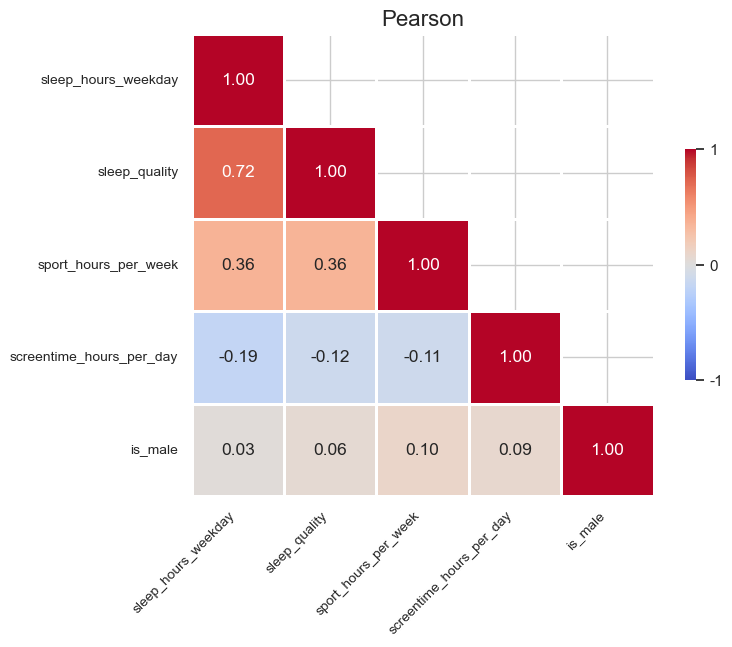

In [35]:
num_corr_heatmap(df.drop(columns='id').corr())

In [36]:
df.is_male.value_counts(normalize=True)

is_male
0    0.557692
1    0.442308
Name: proportion, dtype: float64

In [37]:
X = df.drop(columns=['id', 'sleep_quality', 'sleep_hours_weekday'])
y = df['sleep_quality']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          sleep_quality   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.495
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0710
Time:                        15:17:58   Log-Likelihood:                -118.79
No. Observations:                  52   AIC:                             245.6
Df Residuals:                      48   BIC:                             253.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

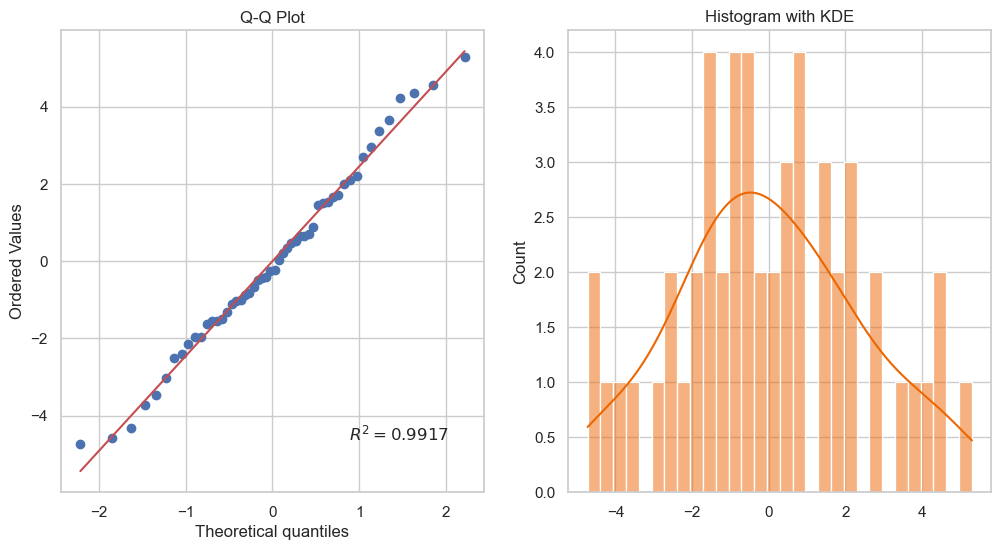

Shapiro-Wilk normality test: p-value = 0.8123422835044677
D'Agostino's K^2 normality test: p-value = 0.8185777182092044
Kolmogorov-Smirnov normality test: p-value = 0.98929551004186
Anderson-Darling normality test: statistic = 0.16977191042163753, critical value = 0.737


In [38]:
check_normality(model.resid)